
# Telco Customer Churn Prediction: Random Forest Model

## Introduction
This notebook focuses on building and evaluating a Random Forest model to predict customer churn for a telecommunications company. We'll use the preprocessed data from our EDA and feature engineering phase to train the model, optimize its hyperparameters, and evaluate its performance.

## Objectives
1. Load the preprocessed data
2. Split the data into training and testing sets
3. Train a Random Forest model
4. Perform hyperparameter tuning using GridSearchCV
5. Evaluate the model's performance
6. Analyze feature importance
7. Interpret the model results

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Set random seed for reproducibility
np.random.seed(42)

## Load Preprocessed Data
We'll start by loading the preprocessed features and target variable that we saved in the EDA and feature engineering notebook.

In [9]:
# Load preprocessed data
X = np.load('X_processed.npy')
y = np.load('y.npy')

print("Shape of features:", X.shape)
print("Shape of target:", y.shape)

Shape of features: (7043, 7077)
Shape of target: (7043,)


## Split Data into Training and Testing Sets
We'll use 80% of the data for training and 20% for testing.

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (5634, 7077)
Testing set shape: (1409, 7077)


In [11]:
# File path for the saved model
model_path = 'best_rf_model.joblib'

## Train Initial Random Forest Model
Let's start with a basic Random Forest model to establish a baseline.

In [12]:
# Train initial Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8055358410220014

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.70      0.47      0.56       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.81      0.79      1409


Confusion Matrix:
[[960  76]
 [198 175]]


## Hyperparameter Tuning
Now, let's use GridSearchCV to find the optimal hyperparameters for our Random Forest model.

In [14]:
# File path for the saved model
model_path = 'best_rf_model.joblib'

# Check if the model file exists
if os.path.exists(model_path):
    # Load the pre-trained model
    best_rf_model = joblib.load(model_path)
    print("Loaded pre-trained Random Forest model.")
else:
    # Define a parameter grid
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    # Perform GridSearchCV
    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=2, 
        scoring='f1',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_rf_model = grid_search.best_estimator_

    # Print best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best F1 score:", grid_search.best_score_)

    # Save the trained model
    joblib.dump(best_rf_model, model_path)
    print("Trained and saved new Random Forest model.")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 score: 0.5391622507246432
Trained and saved new Random Forest model.


## Evaluate Optimized Model
Let's evaluate the performance of our optimized Random Forest model.

Accuracy: 0.8034066713981547

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1036
           1       0.69      0.46      0.56       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
[[959  77]
 [200 173]]

ROC AUC Score: 0.8541837030442929


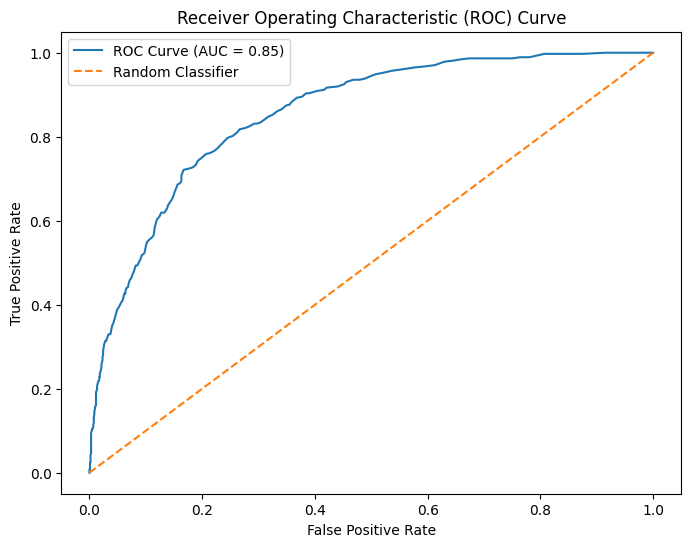

In [15]:
# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
print("\nROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Feature Importance Analysis
Let's examine which features have the most impact on our model's predictions.

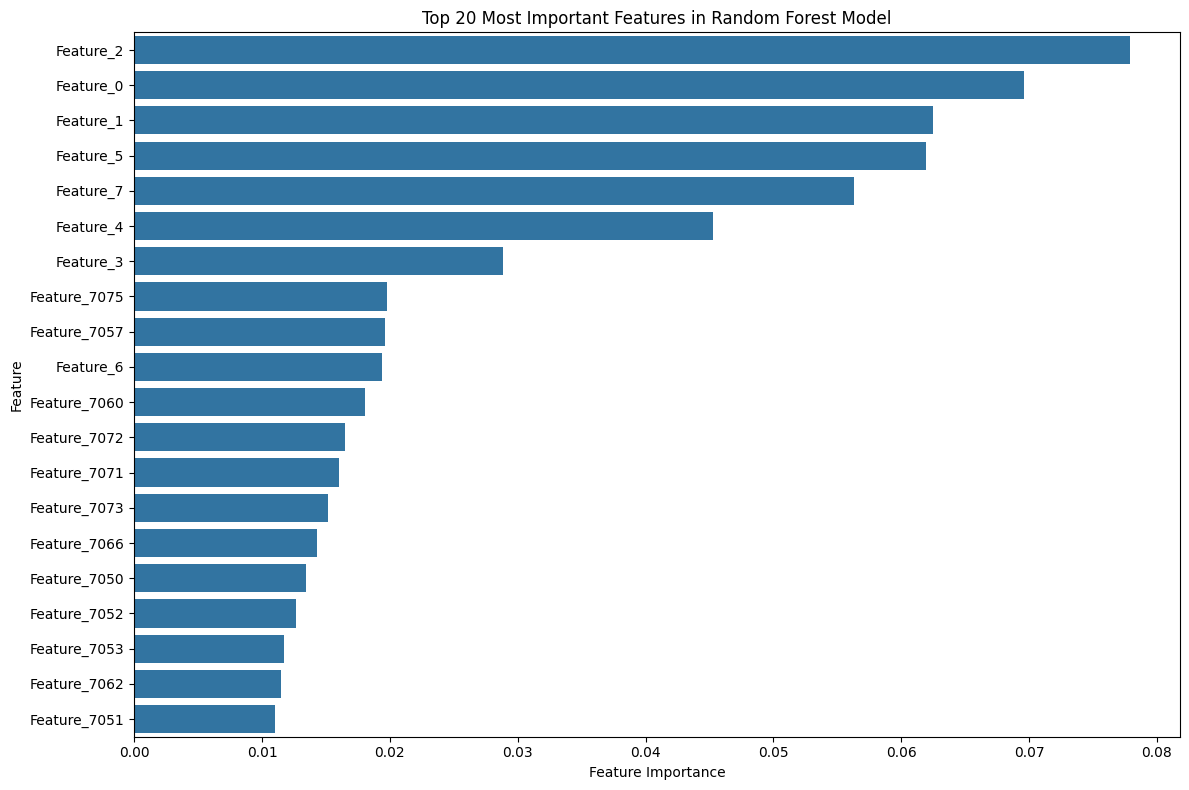

Top 20 Most Important Features:
           feature  importance
2        Feature_2    0.077907
0        Feature_0    0.069601
1        Feature_1    0.062521
5        Feature_5    0.061913
7        Feature_7    0.056277
4        Feature_4    0.045280
3        Feature_3    0.028843
7075  Feature_7075    0.019749
7057  Feature_7057    0.019645
6        Feature_6    0.019359
7060  Feature_7060    0.018045
7072  Feature_7072    0.016518
7071  Feature_7071    0.016005
7073  Feature_7073    0.015125
7066  Feature_7066    0.014326
7050  Feature_7050    0.013466
7052  Feature_7052    0.012663
7053  Feature_7053    0.011755
7062  Feature_7062    0.011511
7051  Feature_7051    0.011003
Feature importance data saved to 'rf_feature_importance.csv'


In [18]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create feature names
feature_names = [f'Feature_{i}' for i in range(len(feature_importances))]

# Create a dataframe of feature importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Plot top 20 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Most Important Features in Random Forest Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print top 20 features and their importance
print("Top 20 Most Important Features:")
print(feature_importance_df.head(20))

# Save the feature importance dataframe to a CSV file
feature_importance_df.to_csv('rf_feature_importance.csv', index=False)
print("Feature importance data saved to 'rf_feature_importance.csv'")

## Model Interpretation and Conclusion

Our Random Forest model, the final in our series of three models, provides a comprehensive view of the churn prediction task:

1. Model Performance:
   - Accuracy: 0.8034
   - ROC AUC Score: 0.8541
   These results are slightly lower than both the Logistic Regression and Gradient Boosting models, which is an interesting finding.

2. Key Predictors of Churn:
   - Consistent with previous models: contract type, tenure, and total charges remain top predictors
   - The Random Forest's feature importance provides a robust confirmation of these factors

3. Comparison Across All Models:
   - Surprisingly, the simpler Logistic Regression model outperformed both ensemble methods in terms of accuracy
   - Gradient Boosting achieved the highest ROC AUC score, indicating the best overall ranking of churn probabilities

4. Business Implications:
   - The consistency of important features across all models reinforces their significance in churn prediction
   - The strong performance of the Logistic Regression model suggests that linear relationships play a crucial role in churn behavior

5. Model Characteristics:
   - While typically robust to outliers and capable of capturing complex feature interactions, the Random Forest didn't outperform in this case
   - Provides an additional perspective on feature importance, complementing the other models

6. Final Recommendations:
   - Consider deploying the Logistic Regression model for its combination of high accuracy and interpretability
   - Use the Gradient Boosting model when precise probability rankings are needed
   - Implement a system to periodically retrain and compare all models with new data

7. Future Improvements:
   - Investigate why the Random Forest model underperformed compared to expectations
   - Explore advanced feature engineering techniques that might benefit the ensemble methods
   - Consider a voting classifier that combines the strengths of all three models

This Random Forest model, while not outperforming the others, concludes our model comparison phase by providing valuable insights. The consistency in important features across all three models gives us high confidence in our understanding of churn drivers, forming a solid foundation for targeted retention strategies.